In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import to_categorical
from keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from keras.layers import SeparableConv1D
from keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from keras.regularizers import l2,l1
from keras.layers import BatchNormalization
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from keras import optimizers
from keras.layers import LSTM
from keras.layers import GRU, SimpleRNN
from keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns


In [2]:
def historyVisualization(history):
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()

def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    xticklabels=LABELS,
    yticklabels=LABELS,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [3]:

N_FEATURES = 8

In [4]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [5]:

file_path_Train = pd.read_csv(r"C:\Users\PC\Desktop\Biopatrec\All_Train.csv", header = None,names = column_names)
def read_data_Train(file_path_Train):
    df_Train = file_path_Train
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [6]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [7]:
file_path_Test = pd.read_csv(r"C:\Users\PC\Desktop\Biopatrec\All_Test.csv", header = None,names = column_names)
def read_data_Test(file_path_Test):
    df_Test = file_path_Test
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test


In [8]:
df_Train = read_data_Train(file_path_Train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

C:\Users\PC\AppData\Local\Temp\ipykernel_13960\1605702155.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(x)


Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.042100,0.063803,0.039470,0.034702,0.028454,0.008396,0.045553,0.028783,1.0
1,0.029769,0.038812,0.026317,0.048019,0.018918,0.023357,0.039963,0.041443,1.0
2,0.036510,0.027468,0.026481,0.023522,0.020069,0.038319,0.035688,0.013492,1.0
3,0.035195,0.030427,0.044402,0.020069,0.028290,0.027632,0.023686,0.039141,1.0
4,0.033551,0.042265,0.022042,0.026481,0.039963,0.027468,0.026974,0.027796,1.0
5,0.038155,0.070051,0.026317,0.041772,0.046540,0.045882,0.006587,0.058542,1.0
6,0.031907,0.060844,0.024837,0.012177,0.025824,0.036675,0.040785,0.041443,1.0
7,0.048513,0.058377,0.044731,0.016288,0.015794,0.022535,0.019083,0.029441,1.0
8,0.034044,0.039634,0.036510,0.026974,0.042100,0.016288,0.017274,0.028783,1.0
9,0.039141,0.025001,0.011355,0.036017,0.058049,-0.010019,0.014315,0.009053,1.0


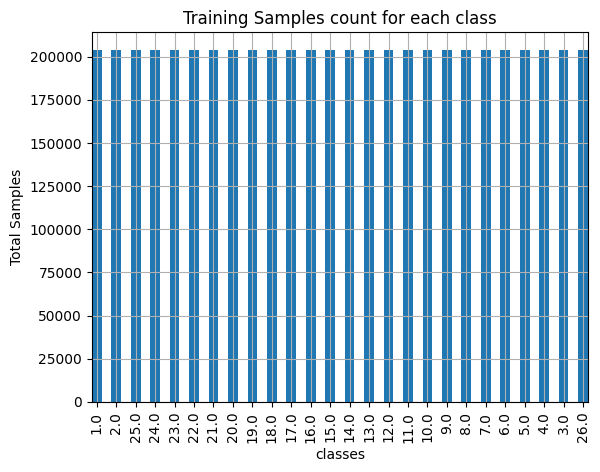

In [9]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [10]:
df_Test = read_data_Test(file_path_Test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(6001)

C:\Users\PC\AppData\Local\Temp\ipykernel_13960\1605702155.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(x)


Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.033058,0.040292,0.023028,0.028125,0.043745,0.014808,0.002806,0.018096,1.0
1,0.027468,0.040621,0.026317,0.066927,0.046540,0.023357,0.028454,0.037826,1.0
2,0.025988,0.044238,0.011848,0.051965,0.036510,0.037826,0.023686,0.053116,1.0
3,0.032564,0.031742,0.007738,0.043909,0.025988,0.028783,0.033222,0.040785,1.0
4,0.042923,0.058542,0.012177,0.030098,0.044073,0.032564,0.028454,0.021549,1.0
...,...,...,...,...,...,...,...,...,...
5996,0.057227,-0.767472,0.184647,0.050321,-0.008375,0.185305,0.204870,0.073668,1.0
5997,0.142722,-0.970687,0.208487,0.031414,0.021549,0.231176,0.200924,0.042594,1.0
5998,0.127267,-0.860201,0.255016,0.056076,0.069722,0.249098,0.054267,-0.048492,1.0
5999,0.113127,-0.662412,0.312068,0.052952,0.069722,0.262580,-0.052273,-0.124779,1.0


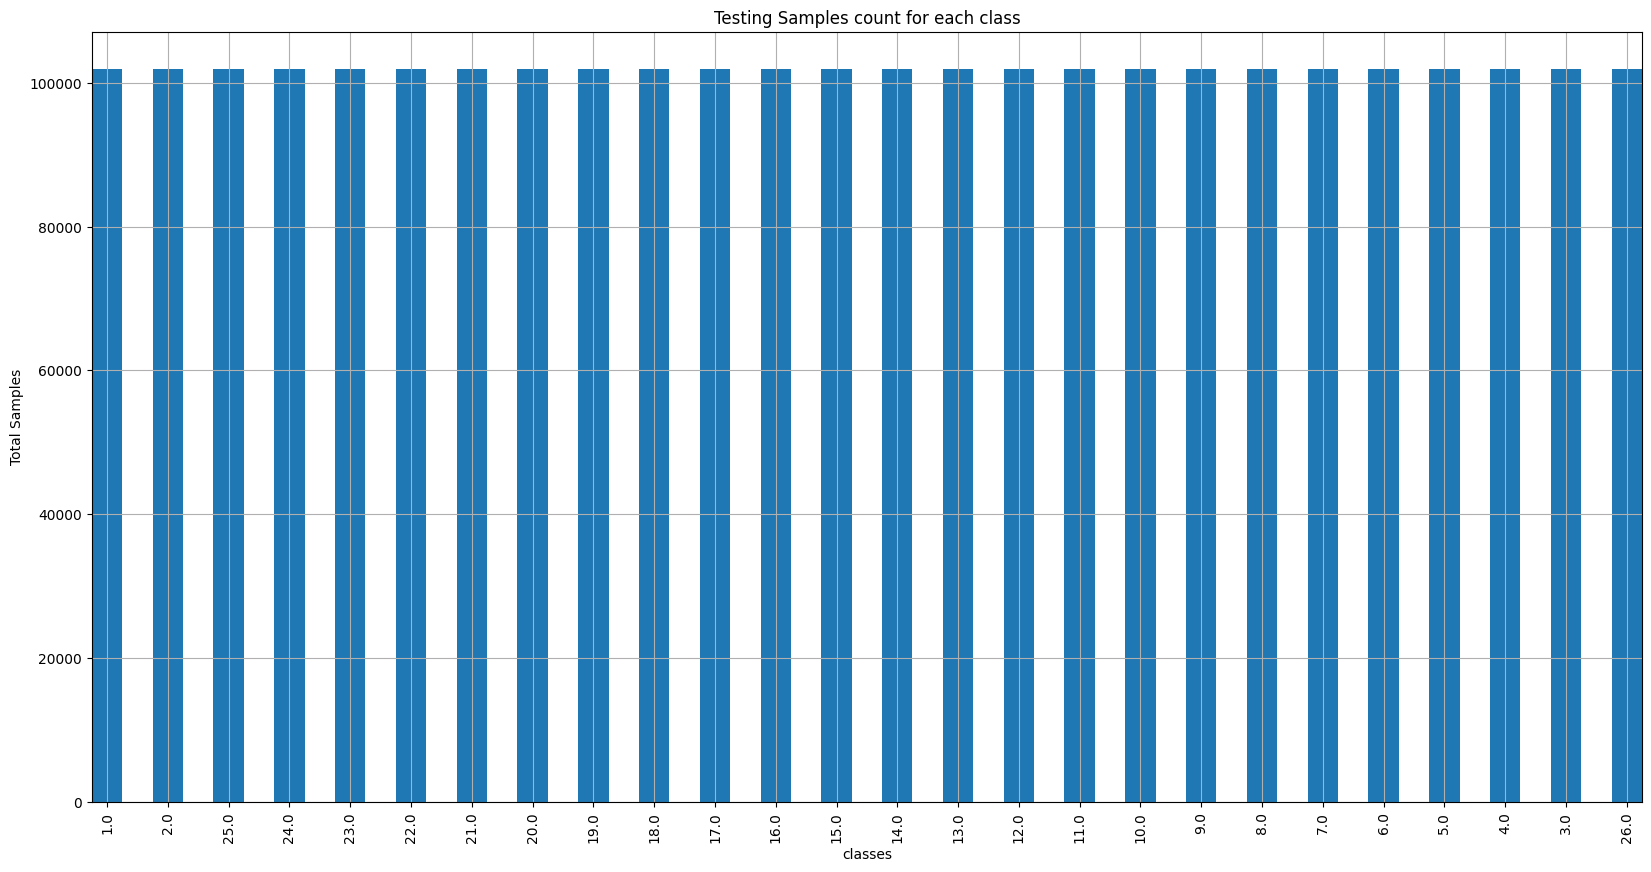

In [11]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [12]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.04210,0.06380,0.03947,0.03470,0.02845,0.00840,0.04555,0.02878,1.00000
1,0.02977,0.03881,0.02632,0.04802,0.01892,0.02336,0.03996,0.04144,1.00000
2,0.03651,0.02747,0.02648,0.02352,0.02007,0.03832,0.03569,0.01349,1.00000
3,0.03519,0.03043,0.04440,0.02007,0.02829,0.02763,0.02369,0.03914,1.00000
4,0.03355,0.04226,0.02204,0.02648,0.03996,0.02747,0.02697,0.02780,1.00000


In [13]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.05980,0.06532,0.04655,0.01810,0.11358,-0.10005,0.13414,0.00271,1.00000
1,-0.00393,-0.01748,-0.02994,0.16057,0.02098,0.00500,0.09658,0.11084,1.00000
2,0.03091,-0.05507,-0.02899,-0.10151,0.03216,0.11006,0.06785,-0.12788,1.00000
3,0.02412,-0.04526,0.07524,-0.13845,0.11199,0.03502,-0.01280,0.09118,1.00000
4,0.01562,-0.00604,-0.05480,-0.06985,0.22534,0.03387,0.00929,-0.00572,1.00000


In [14]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03306,0.04029,0.02303,0.02813,0.04374,0.01481,0.00281,0.01810,1.00000
1,0.02747,0.04062,0.02632,0.06693,0.04654,0.02336,0.02845,0.03783,1.00000
2,0.02599,0.04424,0.01185,0.05196,0.03651,0.03783,0.02369,0.05312,1.00000
3,0.03256,0.03174,0.00774,0.04391,0.02599,0.02878,0.03322,0.04079,1.00000
4,0.04292,0.05854,0.01218,0.03010,0.04407,0.03256,0.02845,0.02155,1.00000


In [15]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.01307,-0.01258,-0.04907,-0.05227,0.26207,-0.05502,-0.15311,-0.08856,1.00000
1,-0.01582,-0.01149,-0.02994,0.36286,0.28921,0.00500,0.01924,0.07995,1.00000
2,-0.02347,0.00050,-0.11409,0.20279,0.19181,0.10660,-0.01280,0.21053,1.00000
3,0.01052,-0.04091,-0.13800,0.11660,0.08963,0.04310,0.05128,0.10522,1.00000
4,0.06406,0.04789,-0.11218,-0.03116,0.26525,0.06965,0.01924,-0.05907,1.00000


In [16]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0        0.05980  0.06532  0.04655  0.01810  0.11358 -0.10005  0.13414   
1       -0.00393 -0.01748 -0.02994  0.16057  0.02098  0.00500  0.09658   
2        0.03091 -0.05507 -0.02899 -0.10151  0.03216  0.11006  0.06785   
3        0.02412 -0.04526  0.07524 -0.13845  0.11199  0.03502 -0.01280   
4        0.01562 -0.00604 -0.05480 -0.06985  0.22534  0.03387  0.00929   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.34295 -0.09974  0.02361  0.32768  0.25568 -0.04810 -0.02606   
5303996 -0.74741 -0.04363 -0.38565 -0.24223 -0.22170 -0.31246 -0.15863   
5303997 -1.00912  0.11925 -0.60558 -0.62393 -0.06364 -0.40828 -0.17521   
5303998  0.49655  0.28104 -0.37227 -0.15429 -0.14187 -0.08619 -0.05810   
5303999  1.15592  0.05715 -0.01177  0.02337  0.03216  0.03733 -0.03601   

              C8  Class_label  ActivityEncoded  
0        0.00271      1.00000                0  

In [17]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [18]:
# The number of steps within one time segment
TIME_PERIODS = 6000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 6000

In [19]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (883, 6000, 8)
883 training samples
y_train shape:  (883,)
6000
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (6000, 8)
input_shape: (6000, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (883, 26)


In [20]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot =to_categorical(y_test, num_classes)

x_test shape:  (441, 6000, 8)
441 testing samples
y_test shape:  (441,)


In [21]:
 n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 15, 400
n_depth=8
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (883, 15, 400, 8)
x_test shape:  (441, 15, 400, 8)
n_outputs 26


In [22]:
def step_decay(epoch):
   initial_lrate = 1e-4
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [23]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
verbose, epochs, batch_size = 0, 200,16

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [34]:
# naveen architecture
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l2(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))
adam=optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_36 (TimeD  (None, 15, 200, 64)       4672      
 istributed)                                                     
                                                                 
 time_distributed_37 (TimeD  (None, 15, 200, 64)       256       
 istributed)                                                     
                                                                 
 time_distributed_38 (TimeD  (None, 15, 97, 64)        0         
 istributed)                                                     
                                                                 
 time_distributed_39 (TimeD  (None, 15, 97, 64)        0         
 istributed)                                                     
                                                                 
 time_distributed_40 (TimeD  (None, 15, 49, 64)       

In [35]:
# # naveen architecture
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# # model.add(Bidirectional(LSTM(200)))
# # model.add(Dropout(0.3))
# model.add(Flatten())
# # model.add(Dense(2000, activation='tanh'))
# model.add(Dense(512, activation='relu'))
# # model.add(Dense(200, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# adam=optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# # sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
# model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# print(model.summary())

In [36]:


# Define callbacks
checkpoint_filepath = 'checkpoint.hdf5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, monitor='val_accuracy', save_weights_only=True, save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
csv_logger = CSVLogger('CSVLogger.csv', append=True, separator=';')

In [37]:
# Training the model
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger, checkpoint_callback, early], validation_data=(x_test, y_test_hot), verbose=1)


Epoch 1/200
56/56 [==============================] - ETA: 0s - loss: 3.2903 - accuracy: 0.0906
Epoch 1: val_accuracy improved from -inf to 0.18367, saving model to checkpoint.hdf5
56/56 [==============================] - 19s 248ms/step - loss: 3.2903 - accuracy: 0.0906 - val_loss: 2.6825 - val_accuracy: 0.1837
Epoch 2/200
56/56 [==============================] - ETA: 0s - loss: 2.6581 - accuracy: 0.1744
Epoch 2: val_accuracy improved from 0.18367 to 0.18594, saving model to checkpoint.hdf5
56/56 [==============================] - 13s 232ms/step - loss: 2.6581 - accuracy: 0.1744 - val_loss: 2.8169 - val_accuracy: 0.1859
Epoch 3/200
56/56 [==============================] - ETA: 0s - loss: 2.4392 - accuracy: 0.1948
Epoch 3: val_accuracy improved from 0.18594 to 0.24263, saving model to checkpoint.hdf5
56/56 [==============================] - 13s 226ms/step - loss: 2.4392 - accuracy: 0.1948 - val_loss: 2.4644 - val_accuracy: 0.2426
Epoch 4/200
56/56 [==============================] - ETA: 

KeyboardInterrupt: 

history loss
history accuracy
history val_loss
history val_accuracy


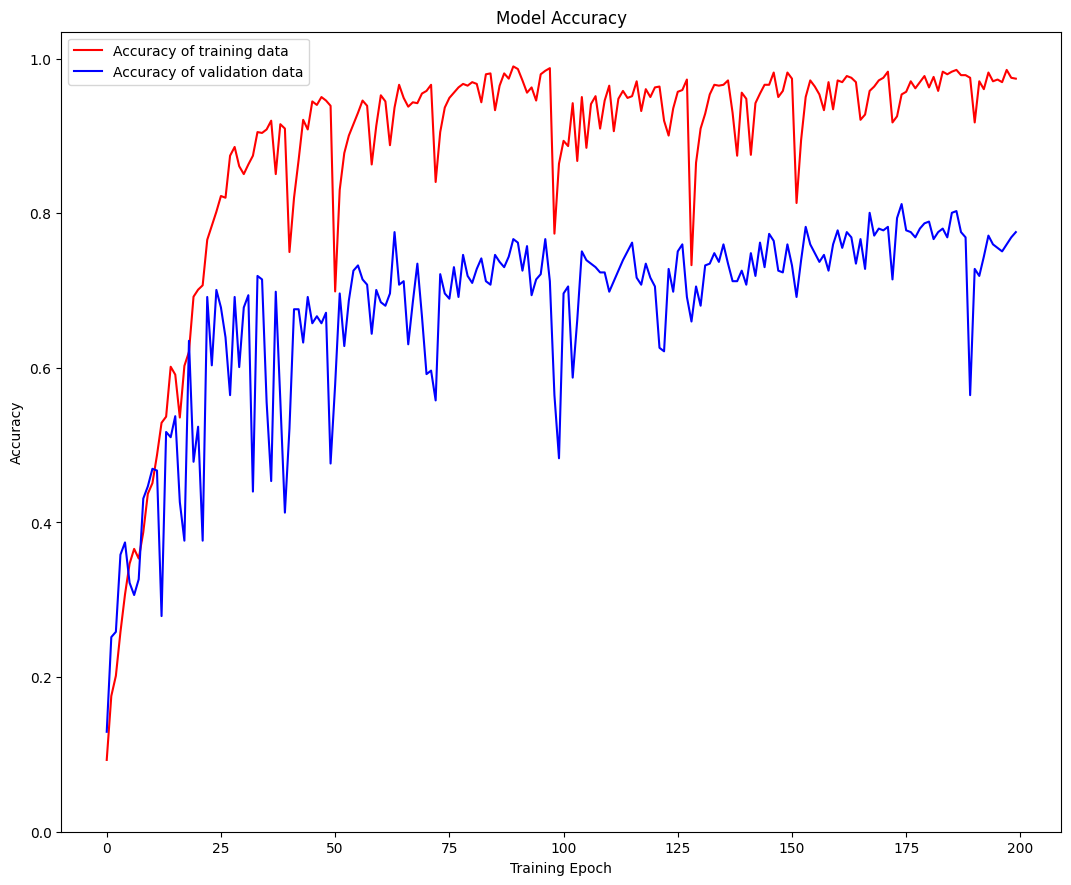

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

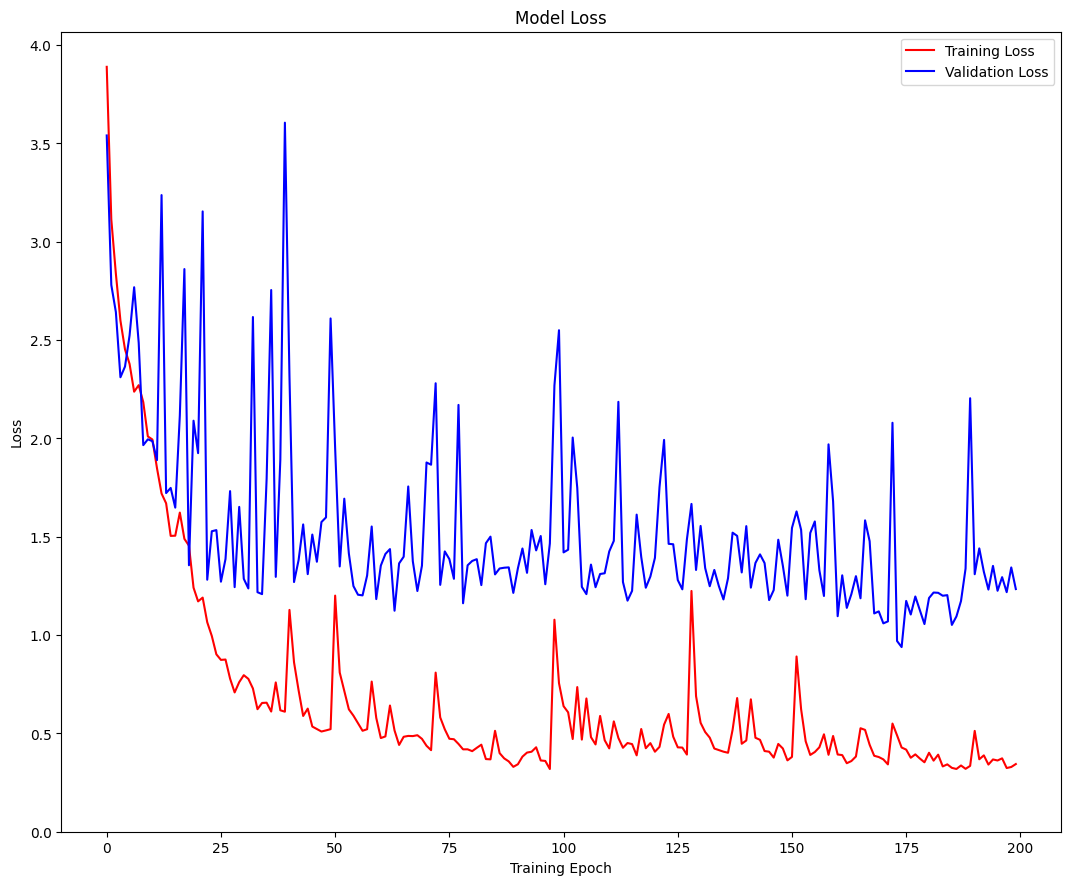

In [ ]:

# Create a figure with a white background
BPRa = plt.figure(figsize=(10, 8), edgecolor='black')
ax = BPRa.add_axes((1, 1, 1, 1))
ax.set(facecolor="white")

# Set spines and colors
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))
ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# Plot training loss and validation loss
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')

# Add title and labels
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')

# Set y-axis limit to show from 0 upwards
plt.ylim(0)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

28/28 [==============================] - 1s 27ms/step - loss: 0.9390 - accuracy: 0.8118
test_accuracy 0.8117913603782654


28/28 [==============================] - 2s 46ms/step


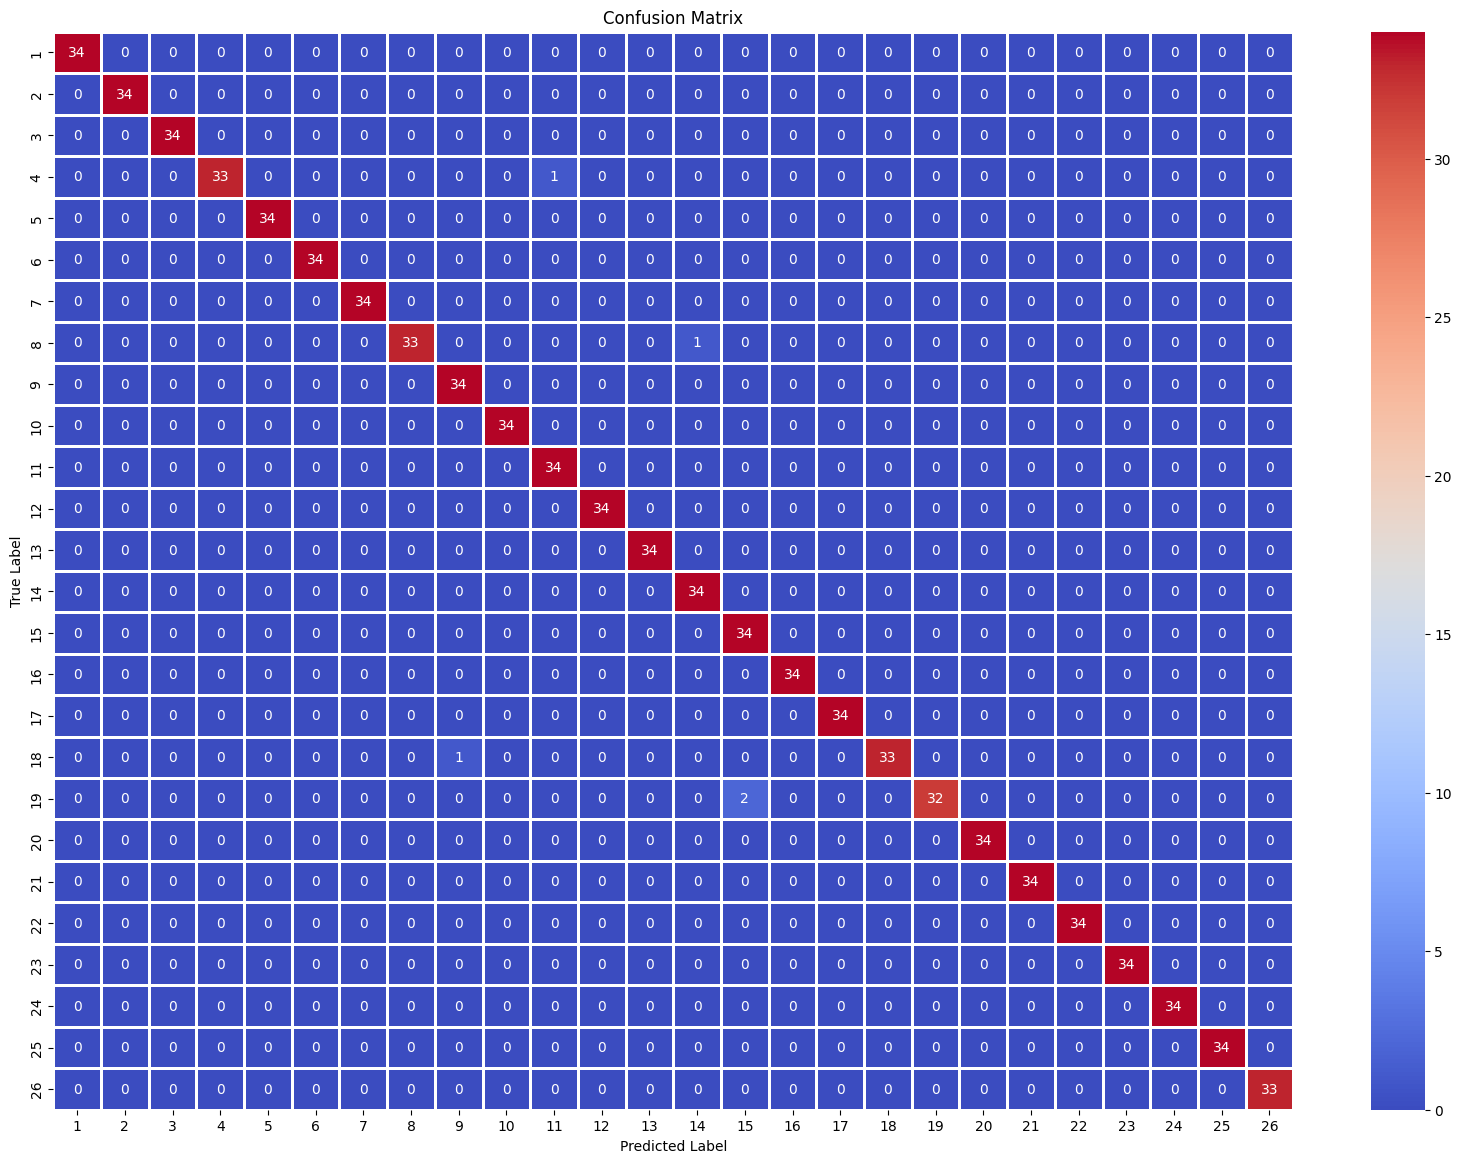

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.99        34
           9       1.00      1.00      1.00        34
          10       0.97      1.00      0.99        34
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        34
          13       0.97      1.00      0.99        34
          14       0.94      1.00      0.97        34
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        34
          17       1.00    

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

14/14 [==============================] - 1s 46ms/step


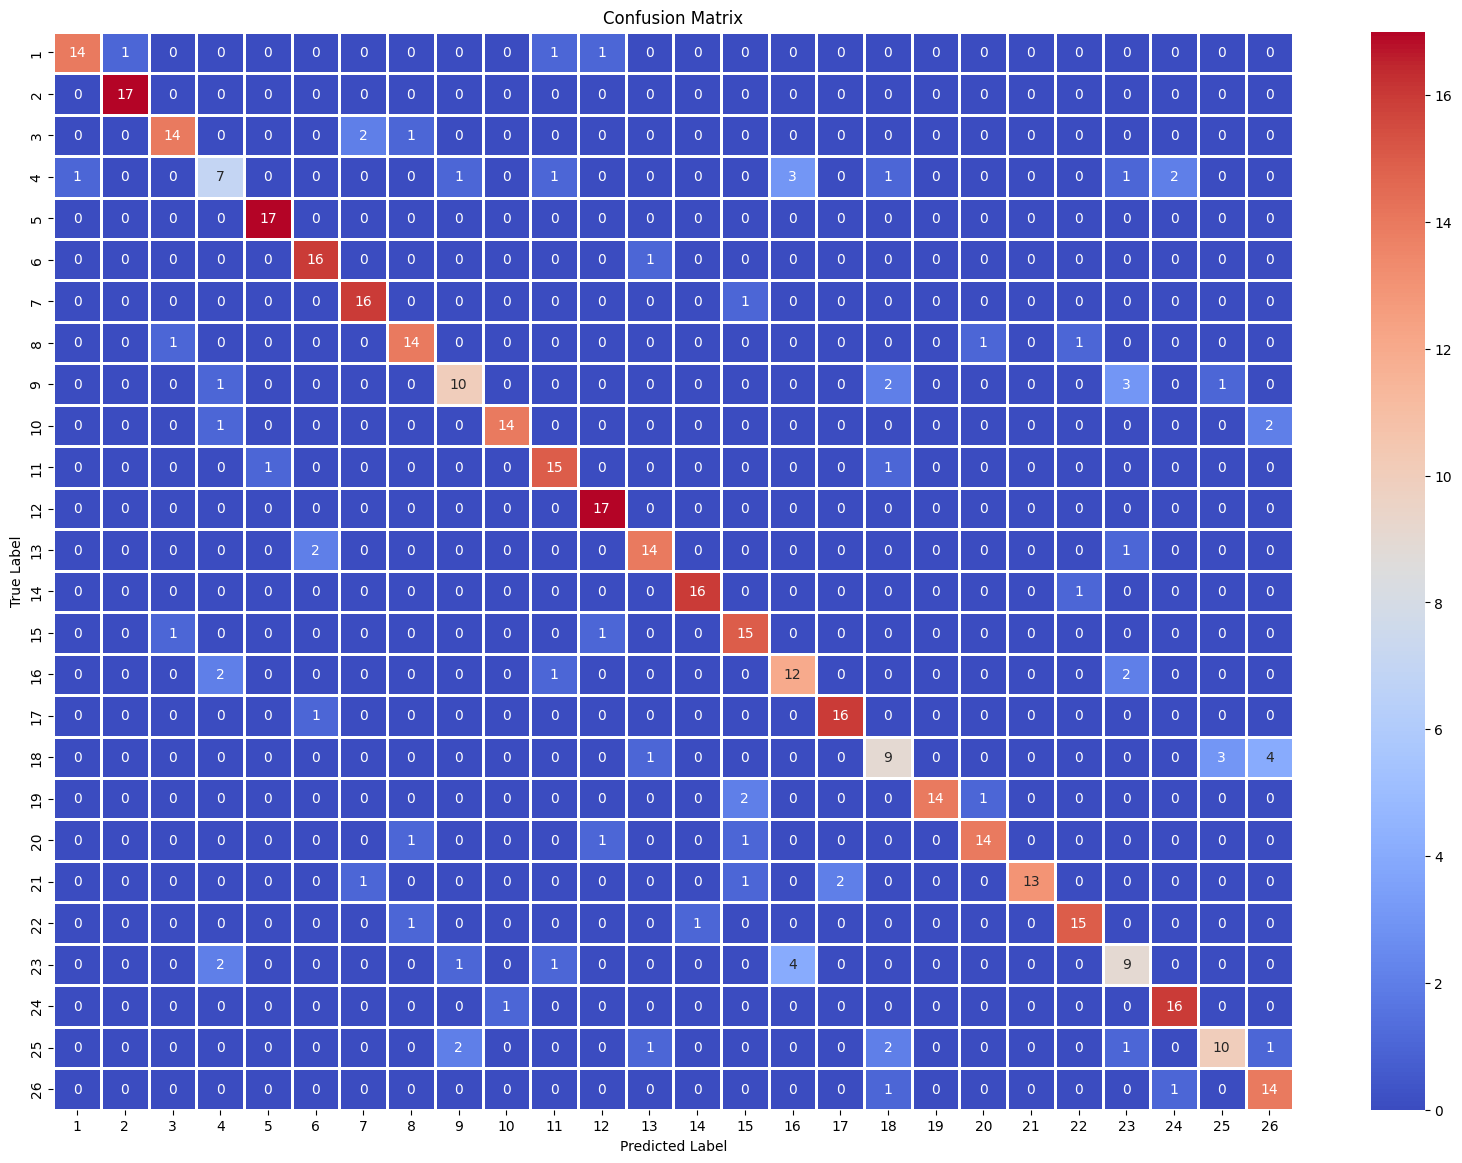

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.94      1.00      0.97        17
           2       0.88      0.82      0.85        17
           3       0.54      0.41      0.47        17
           4       0.94      1.00      0.97        17
           5       0.84      0.94      0.89        17
           6       0.84      0.94      0.89        17
           7       0.82      0.82      0.82        17
           8       0.71      0.59      0.65        17
           9       0.93      0.82      0.87        17
          10       0.79      0.88      0.83        17
          11       0.85      1.00      0.92        17
          12       0.82      0.82      0.82        17
          13       0.94      0.94      0.94        17
          14       0.75      0.88      0.81        17
          15       0.63      0.71      0.67        17
          16       0.89      0.94      0.91        17
          17       0.56    

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))